# Data Pre Processing and Visualisation

In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
file_path = 'DASH_2020_Drug_Data.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'DASH_2020_Drug_Data.csv'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from collections import Counter

# Function to tokenize text into unigrams
def tokenize(text):
    return text.lower().split()

# Tokenize 'body' column
df['tokens'] = df['body'].apply(tokenize)

# Display the first few rows with tokens
df.head()


NameError: name 'df' is not defined

In [ ]:

from collections import defaultdict


# Load LIWC dictionary from file
liwc_file_path = 'LIWC2007_English100131.dic'

def load_liwc_dictionary(file_path):
    liwc_dict = defaultdict(list)
    with open(file_path, 'r') as f:
        lines = f.readlines()
        for line in lines:
            if '%' not in line:
                parts = line.strip().split('\t')
                if len(parts) >= 2:
                    word, categories = parts[0], parts[1:]
                    for category in categories:
                        liwc_dict[category].append(word)
    return liwc_dict

# Manually loaded LIWC dictionary with categories and associated words
liwc_dict = load_liwc_dictionary(liwc_file_path)

# Function to count LIWC categories in text using loaded LIWC dictionary
def count_liwc_categories(text):
    counts = defaultdict(int)
    for category, words in liwc_dict.items():
        for word in words:
            if word.lower() in text.lower().split():
                counts[category] += 1
    return counts

# Apply LIWC category counting to each post
df['liwc_counts'] = df['body'].apply(count_liwc_categories)

# Display the first few rows with LIWC counts
df.head()


,id,username,title,body,#comments,score,label_classification,label_recommendation,tokens,liwc_counts
0,ID_0,NAME_0,a very eventful trip report,so some people may or may not have seen my pos...,5,4,Addicted,Addicted with intention to recover,"[so, some, people, may, or, may, not, have, se...","{'pronoun': 1, '1': 82, '10': 3, '125': 7, '12..."
1,ID_1,NAME_1,First time report,"TL;DR Underwhelming?\n\nHey, just wanted to ma...",5,3,Addicted,Addicted with intention to recover,"[tl;dr, underwhelming?, hey,, just, wanted, to...","{'we': 1, '1': 100, '10': 3, '125': 10, '127':..."
2,ID_2,NAME_2,I'm afraid that I'll never recover properly,"Lately, I've been very concerned about the fac...",13,13,Addicted,Addicted with intention to recover,"[lately,, i've, been, very, concerned, about, ...","{'1': 27, '10': 1, '125': 3, '127': 1, '130': ..."
3,ID_3,NAME_3,Functioning Pill addict... Need help please,I am a functioning (Career/father) on/off pill...,7,12,Addicted,Addicted with intention to recover,"[i, am, a, functioning, (career/father), on/of...","{'article': 1, '1': 31, '10': 2, '125': 1, '13..."
4,ID_4,NAME_4,The lonely life of a drug addict,"Not sure if anyone will actually read this, bu...",47,36,Addicted,Addicted with intention to recover,"[not, sure, if, anyone, will, actually, read, ...","{'1': 37, '10': 2, '125': 1, '131': 13, '146':..."


In [ ]:
print(df['liwc_counts'])

0       {'pronoun': 1, '1': 82, '10': 3, '125': 7, '12...
1       {'we': 1, '1': 100, '10': 3, '125': 10, '127':...
2       {'1': 27, '10': 1, '125': 3, '127': 1, '130': ...
3       {'article': 1, '1': 31, '10': 2, '125': 1, '13...
4       {'1': 37, '10': 2, '125': 1, '131': 13, '146':...
                              ...                        
3146    {'1': 21, '10': 2, '125': 1, '131': 10, '16': ...
3147    {'1': 3, '131': 2, '11': 1, '121': 1, '12': 1,...
3148    {'1': 21, '10': 2, '131': 4, '137': 1, '16': 1...
3149    {'1': 5, '131': 2, '17': 1, '252': 1, '250': 1...
3150    {'1': 14, '10': 1, '125': 3, '127': 1, '131': ...
Name: liwc_counts, Length: 3151, dtype: object


In [ ]:
# Summarize LIWC counts
liwc_summary = defaultdict(int)

for counts in df['liwc_counts']:
    for category, count in counts.items():
        liwc_summary[category] += count

# Convert the summary dictionary to a DataFrame for better visualization
liwc_summary_df = pd.DataFrame(list(liwc_summary.items()), columns=['LIWC Category', 'Total Count'])

# Sort the DataFrame by 'Total Count' in descending order
liwc_summary_df = liwc_summary_df.sort_values(by='Total Count', ascending=False)

# Display the LIWC summary
print(liwc_summary_df)


    LIWC Category  Total Count
1               1       167271
23             11        79503
6             131        66786
16            250        58025
33             14        42933
..            ...          ...
79         posemo            1
97           incl            1
98            anx            1
99         social            1
100         inhib            1

[101 rows x 2 columns]


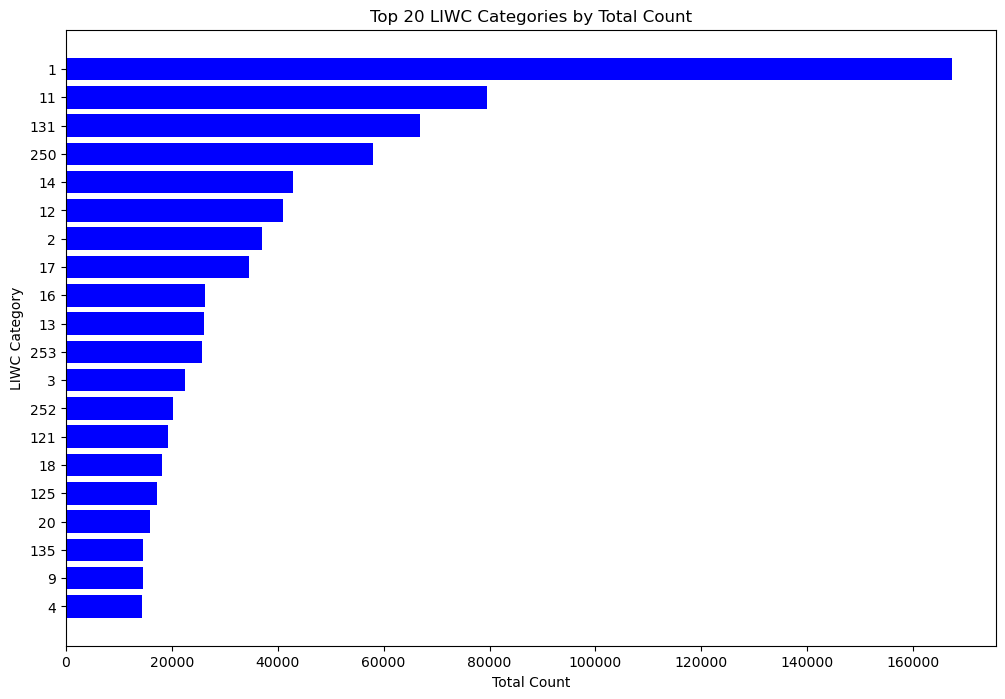

In [ ]:
import matplotlib.pyplot as plt

# Select the top 20 LIWC categories based on total count
top_20_liwc = liwc_summary_df.head(20)

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.barh(top_20_liwc['LIWC Category'], top_20_liwc['Total Count'], color='blue')
plt.xlabel('Total Count')
plt.ylabel('LIWC Category')
plt.title('Top 20 LIWC Categories by Total Count')
plt.gca().invert_yaxis()  # Invert y-axis to display highest count at the top
plt.show()


In [ ]:
from scipy.stats import ttest_ind

# Define the addiction/recovery stages
stages = ['Addicted', 'E-Recovery', 'M-Recovery', 'A-Recovery']

# Dictionary to store t-test results for each pair of stages
t_test_results = {}

# Perform pairwise t-tests for LIWC categories between pairs of stages
for i in range(len(stages) - 1):
    for j in range(i + 1, len(stages)):
        stage1 = stages[i]
        stage2 = stages[j]

        # Filter the DataFrame for the two stages
        df_stage1 = df[df['label_classification'] == stage1]
        df_stage2 = df[df['label_classification'] == stage2]

        # Dictionary to store t-test results for LIWC categories
        t_test_results[(stage1, stage2)] = {}

        for category in liwc_dict.keys():
            counts_stage1 = df_stage1['liwc_counts'].apply(lambda x: x.get(category, 0))
            counts_stage2 = df_stage2['liwc_counts'].apply(lambda x: x.get(category, 0))

            # Perform t-test for the two stages
            t_stat, p_value = ttest_ind(counts_stage1, counts_stage2)

            # Store the t-test results
            t_test_results[(stage1, stage2)][category] = {'t_stat': t_stat, 'p_value': p_value}

# Display t-test results for a sample pair of stages
sample_pair = ('Addicted', 'E-Recovery')
print(f"T-test results between {sample_pair[0]} and {sample_pair[1]}:")
for category, results in t_test_results[sample_pair].items():
    print(f"{category}: t-statistic = {results['t_stat']}, p-value = {results['p_value']}")


T-test results between Addicted and E-Recovery:
funct: t-statistic = 4.265971942350929, p-value = 2.0881550993418926e-05
pronoun: t-statistic = 5.181921582237425, p-value = 2.429282678220984e-07
ppron: t-statistic = 2.3386758521244873, p-value = 0.019455412023965783
i: t-statistic = 2.8383562804367197, p-value = 0.004582833984476117
we: t-statistic = 3.773368067730804, p-value = 0.00016599529780386544
you: t-statistic = 1.245321996219186, p-value = 0.21316697052031788
shehe: t-statistic = 1.463899118154919, p-value = 0.14338693357272791
they: t-statistic = 0.8316957017792709, p-value = 0.4056852390240775
ipron: t-statistic = 1.294715355092663, p-value = 0.19557575664964338
article: t-statistic = 5.157317599887777, p-value = 2.7660359336078403e-07
verb: t-statistic = 0.02639141944147552, p-value = 0.9789479095415559
auxverb: t-statistic = 2.7555119436706095, p-value = 0.005915968617560643
past: t-statistic = -0.33889870991218835, p-value = 0.7347234855401648
present: t-statistic = -0.36

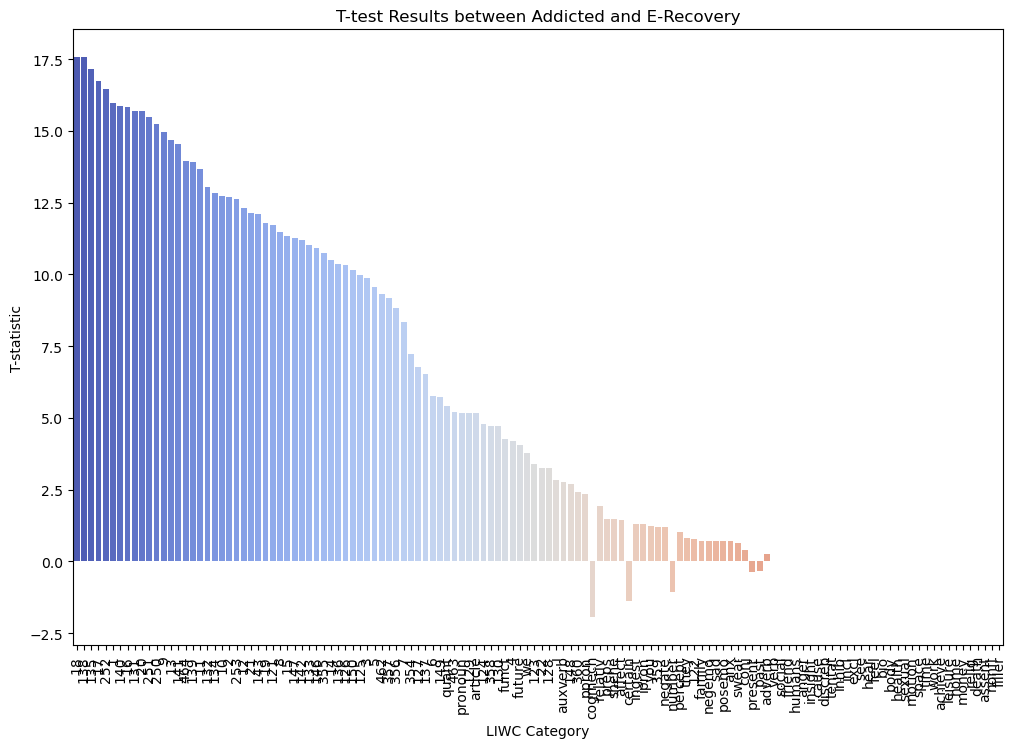

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the LIWC categories and their t-test results for the sample pair
sample_results = t_test_results[('Addicted', 'E-Recovery')]

# Convert results to DataFrame for plotting
sample_df = pd.DataFrame(sample_results).T.reset_index()
sample_df.columns = ['LIWC Category', 'T-statistic', 'P-value']

# Sort by P-value for better visualization
sample_df = sample_df.sort_values(by='P-value')

# Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='LIWC Category', y='T-statistic', data=sample_df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('T-test Results between Addicted and E-Recovery')
plt.xlabel('LIWC Category')
plt.ylabel('T-statistic')
plt.show()


In [ ]:

# Define the stage pairs
stage_pairs = [('E-Recovery', 'M-Recovery'), ('M-Recovery', 'A-Recovery')]

# Perform pairwise t-tests for LIWC categories between other stage pairs
for stage1, stage2 in stage_pairs:
    print(f"T-test results between {stage1} and {stage2}:")
    for category, results in t_test_results[(stage1, stage2)].items():
        print(f"{category}: t-statistic = {results['t_stat']}, p-value = {results['p_value']}")
    print("="*50)


T-test results between E-Recovery and M-Recovery:
funct: t-statistic = -2.868941874818221, p-value = 0.004184492375506284
pronoun: t-statistic = -0.1894239753512902, p-value = 0.8497898566434892
ppron: t-statistic = 0.11841778600590529, p-value = 0.9057547744838592
i: t-statistic = -0.5679263089047146, p-value = 0.5701822557069287
we: t-statistic = 1.3041930434324038, p-value = 0.19239669661626757
you: t-statistic = -1.2406342624027675, p-value = 0.21496286046583132
shehe: t-statistic = -0.5726649094903168, p-value = 0.5669697964090381
they: t-statistic = 0.478471290155919, p-value = 0.632394584629465
ipron: t-statistic = -3.3771358649243575, p-value = 0.0007539126208707714
article: t-statistic = 0.729759457954512, p-value = 0.4656675962218052
verb: t-statistic = -0.4230359337929183, p-value = 0.6723384255760405
auxverb: t-statistic = -1.0351360942822603, p-value = 0.3007962564129501
past: t-statistic = -1.1101544100121656, p-value = 0.2671360728750859
present: t-statistic = 2.14139937

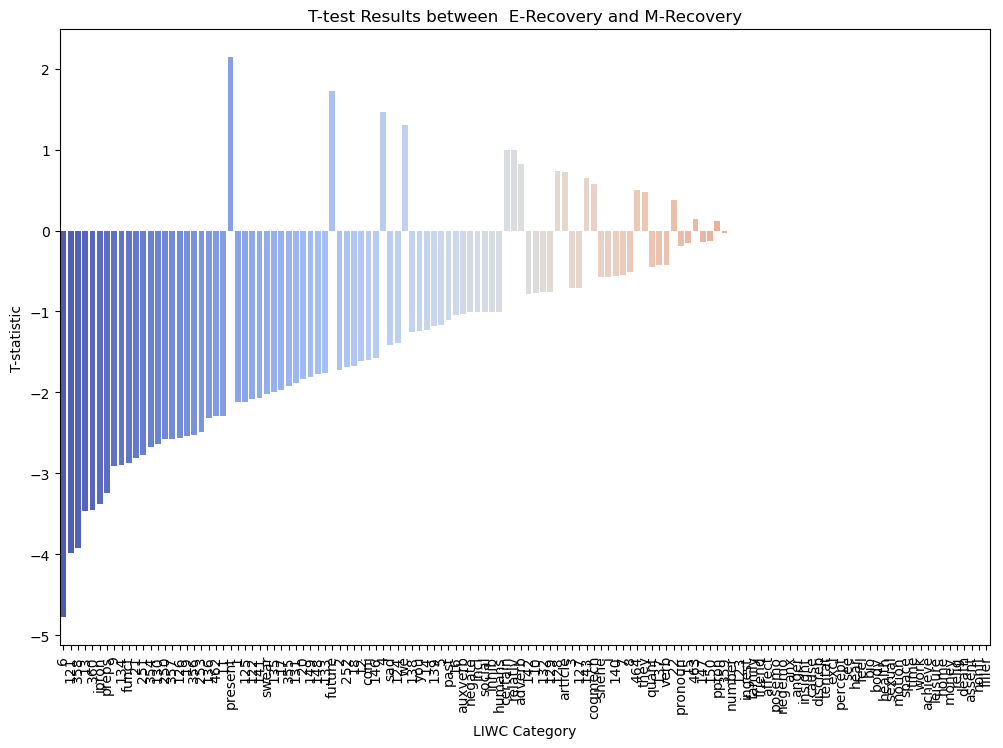

In [ ]:
# Extract the LIWC categories and their t-test results for the sample pair
sample_results = t_test_results[('E-Recovery', 'M-Recovery')]

# Convert results to DataFrame for plotting
sample_df = pd.DataFrame(sample_results).T.reset_index()
sample_df.columns = ['LIWC Category', 'T-statistic', 'P-value']

# Sort by P-value for better visualization
sample_df = sample_df.sort_values(by='P-value')

# Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='LIWC Category', y='T-statistic', data=sample_df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('T-test Results between  E-Recovery and M-Recovery')
plt.xlabel('LIWC Category')
plt.ylabel('T-statistic')
plt.show()


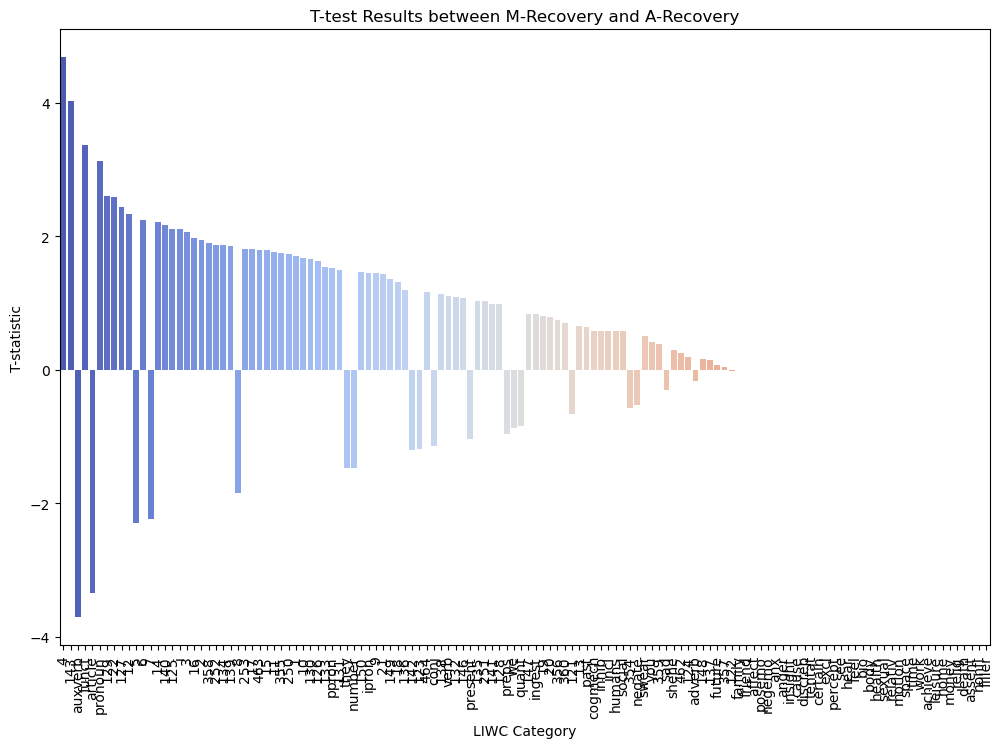

In [ ]:
# Extract the LIWC categories and their t-test results for the sample pair
sample_results = t_test_results[('M-Recovery', 'A-Recovery')]

# Convert results to DataFrame for plotting
sample_df = pd.DataFrame(sample_results).T.reset_index()
sample_df.columns = ['LIWC Category', 'T-statistic', 'P-value']

# Sort by P-value for better visualization
sample_df = sample_df.sort_values(by='P-value')

# Create bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='LIWC Category', y='T-statistic', data=sample_df, palette='coolwarm')
plt.xticks(rotation=90)
plt.title('T-test Results between M-Recovery and A-Recovery')
plt.xlabel('LIWC Category')
plt.ylabel('T-statistic')
plt.show()